In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib import ticker
from matplotlib.ticker import AutoMinorLocator
import datetime as dt
from scipy import stats

In [2]:
# Plot a good event for Bz, By, and n
goodOmni = pd.read_csv('../output-data/Omni/Omni_2019-11-27_13-00.csv', index_col=0, header=0)
goodOmni['Time'] = pd.to_datetime(goodOmni['Time'], format='%Y-%m-%d %H:%M:%S')
goodArtemis = pd.read_csv('../output-data/Artemis/Artemis_2019-11-27_13-00.csv', index_col=0, header=0)
goodArtemis['Time'] = pd.to_datetime(goodArtemis['Time'], format='%Y-%m-%d %H:%M:%S')

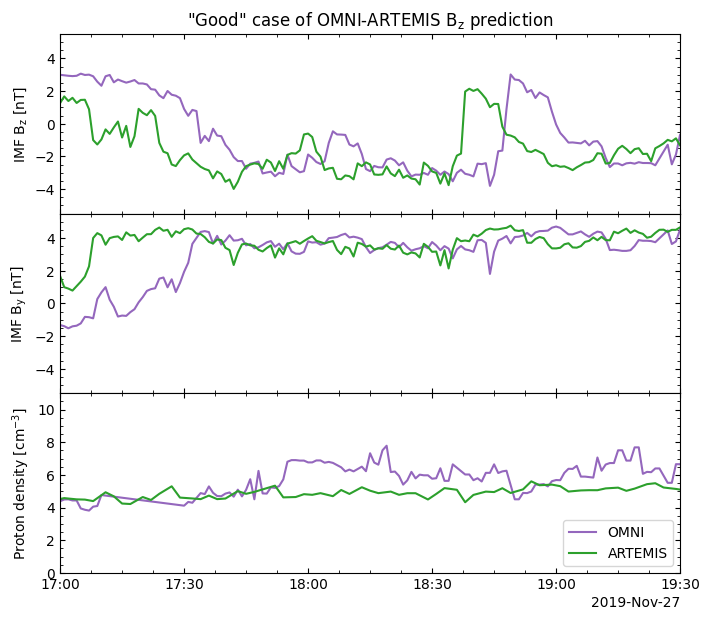

In [3]:
# Plot unshifted data

fig, (ax1, ax2, ax3)  = plt.subplots(3, 1, figsize=(8,7), sharex=True)
plt.subplots_adjust(hspace=0.0)

ax1.plot(goodOmni['Time'], goodOmni['BZ_GSE'], color='C4', label='OMNI')
ax1.plot(goodArtemis['Time'], goodArtemis['BZ_GSE'], color='C2', label='ARTEMIS')
ax1.set_xlim(pd.Timestamp('2019-11-27 17:00:00'), pd.Timestamp('2019-11-27 19:30:00'))
ax1.set_ylabel(r'IMF $\mathrm{B_z}$ [nT]')
ax1.set_ylim((-5.5, 5.5))

ax2.plot(goodOmni['Time'], goodOmni['BY_GSE'], color='C4')
ax2.plot(goodArtemis['Time'], goodArtemis['BY_GSE'], color='C2')
ax2.set_ylabel(r'IMF $\mathrm{B_y}$ [nT]')
ax2.set_ylim((-5.5, 5.5))

ax3.plot(goodOmni['Time'], goodOmni['proton_density'], color='C4', label='OMNI')
ax3.plot(goodArtemis['Time'], goodArtemis['proton_density'], color='C2', label='ARTEMIS')
ax3.set_ylabel(r'Proton density [cm$^{-3}$]')
ax3.set_ylim((0, 11))
ax3.legend(loc='lower right')

ax3.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=8))
ax3.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax3.xaxis.get_major_locator()))

for axes in [ax1, ax2, ax3]:
    axes.tick_params(which='both', axis='both', direction='in', top=True, right=True)
    axes.xaxis.set_minor_locator(AutoMinorLocator())
    axes.yaxis.set_minor_locator(AutoMinorLocator())

ax1.set_title(r'"Good" case of OMNI-ARTEMIS $\mathrm{B_z}$ prediction')
plt.savefig('goodcase.png', dpi=300)

In [4]:
# Plot a bad event for Bz, By, and n
badOmni = pd.read_csv('../output-data/Omni/Omni_2015-03-16_03-50.csv', index_col=0, header=0)
badOmni['Time'] = pd.to_datetime(badOmni['Time'], format='%Y-%m-%d %H:%M:%S')
badArtemis = pd.read_csv('../output-data/Artemis/Artemis_2015-03-16_03-50.csv', index_col=0, header=0)
badArtemis['Time'] = pd.to_datetime(badArtemis['Time'], format='%Y-%m-%d %H:%M:%S')

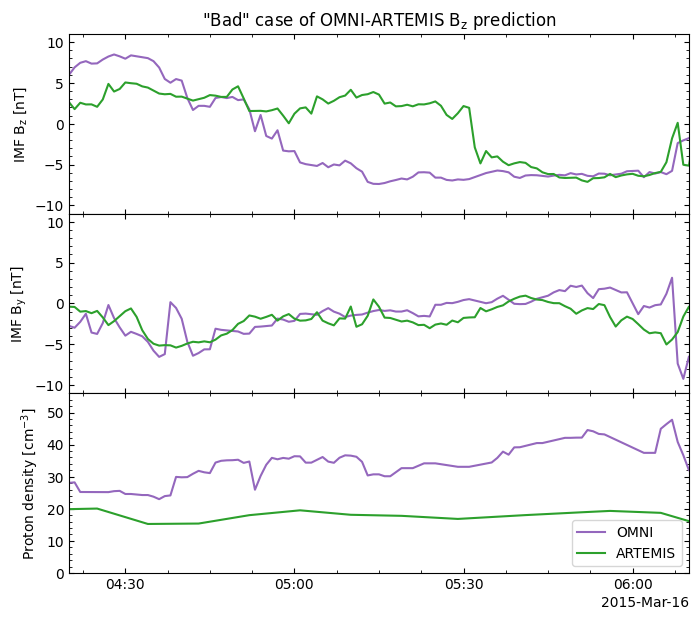

In [5]:
# Plot unshifted data

fig, (ax1, ax2, ax3)  = plt.subplots(3, 1, figsize=(8,7), sharex=True)
plt.subplots_adjust(hspace=0.0)

ax1.plot(badOmni['Time'], badOmni['BZ_GSE'], color='C4', label='OMNI')
ax1.plot(badArtemis['Time'], badArtemis['BZ_GSE'], color='C2', label='ARTEMIS')
ax1.set_xlim(pd.Timestamp('2015-03-16 04:20:00'), pd.Timestamp('2015-03-16 06:10:00'))
ax1.set_ylabel(r'IMF $\mathrm{B_z}$ [nT]')
ax1.set_ylim((-11, 11))

ax2.plot(badOmni['Time'], badOmni['BY_GSE'], color='C4')
ax2.plot(badArtemis['Time'], badArtemis['BY_GSE'], color='C2')
ax2.set_ylabel(r'IMF $\mathrm{B_y}$ [nT]')
ax2.set_ylim((-11, 11))

ax3.plot(badOmni['Time'], badOmni['proton_density'], color='C4', label='OMNI')
ax3.plot(badArtemis['Time'], badArtemis['proton_density'], color='C2', label='ARTEMIS')
ax3.set_ylabel(r'Proton density [cm$^{-3}$]')
ax3.set_ylim((0, 56))
ax3.legend(loc='lower right')

ax3.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=8))
ax3.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax3.xaxis.get_major_locator()))

for axes in [ax1, ax2, ax3]:
    axes.tick_params(which='both', axis='both', direction='in', top=True, right=True)
    axes.xaxis.set_minor_locator(AutoMinorLocator())
    axes.yaxis.set_minor_locator(AutoMinorLocator())

ax1.set_title(r'"Bad" case of OMNI-ARTEMIS $\mathrm{B_z}$ prediction')
plt.savefig('badcase.png', dpi=300)

In [9]:
def correlate(sliding, fixed, start_timestamp, stop_timestamp, title, filename):
    dataRows = []

    fixed_start = (fixed.loc[fixed['Time'] == start_timestamp]).index[0]
    fixed_stop = (fixed.loc[fixed['Time'] == stop_timestamp]).index[0]
    sliding_start = (sliding.loc[sliding['Time'] == fixed['Time'][fixed_start]]).index[0] # Set the start time of the sliding index where the timestamp of the fixed series begins
    sliding_stop = (sliding.loc[sliding['Time'] == fixed['Time'][fixed_stop]]).index[0] # Set the end of the sliding index two hours and a half after the start

    print(fixed_start)
    print(fixed_stop)
    print(sliding_start)
    print(sliding_stop)


    keys = ['BX_GSE']
    pMaxes = []
    ratioMaxes = []
    pOffsets = []
    ratioOffsets = []

    for k in keys:
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), sharex=True)
        plt.subplots_adjust(hspace=0.0)
        corrStore = [] # Temp storage array for coefficients
        avgStore = []

        print(len(sliding[k][sliding_start-2:sliding_stop-2]))

        for n in range(31): # Calculate a coefficient over a 0 to 30-min window
            corrStore.append(np.corrcoef(fixed[k][fixed_start:fixed_stop], sliding[k][sliding_start-n:sliding_stop-n])[0, 1])  # Append the storage arrays
            #avgStore.append(np.average([((j*i*10)/(np.abs(j*i*10)))*(1/(1+np.abs(j-i))) for i, j in zip(sliding[k][sliding_start - n:sliding_stop - n].to_numpy(), fixed[k][fixed_start:fixed_stop].to_numpy())]))
            avgStore.append(np.nanmean([((o-a)/a) for a, o in zip(sliding[k][sliding_start-n:sliding_stop-n].to_numpy(), fixed[k][fixed_start:fixed_stop].to_numpy())]))

        ax1.scatter(np.arange(0, 31, 1), corrStore, color='C0')
        ax2.scatter(np.arange(0, 31, 1), avgStore, color='C1')

        if all(corrs < 0 for corrs in corrStore[1:]):
            pMaxes.append(max(corrStore[1:], key=abs))
            pOffsets.append(corrStore.index(max(corrStore[1:], key=abs)))
            pShift = corrStore.index(max(corrStore[1:], key=abs))
            pMaxLineHeight = max(corrStore[1:], key=abs)
        else:
            pMaxes.append(max(corrStore[1:]))
            pOffsets.append(corrStore.index(max(corrStore[1:])))
            pShift = corrStore.index(max(corrStore[1:]))
            pMaxLineHeight = max(corrStore[1:])

        ratioMaxes.append(max(avgStore[1:]))
        ratioOffsets.append(avgStore.index(max(avgStore[1:])))
        rShift = avgStore.index(max(avgStore[1:]))

        ax1.vlines(pShift, 0, pMaxLineHeight, linestyle='dashed', color='C0')

        ax1.set_title(title)

        for axes, labels in zip([ax1, ax2],['Correlation Coefficient', 'Hourly Ratio']):
            axes.hlines(0, 0, 30, color='black')
            axes.set_ylim(-1.1, 1.1)
            axes.set_xlim(0, 30)
            axes.set_ylabel(labels)
            axes.set_xlabel("Timeshift (min)")
            axes.tick_params(which='both', axis='both', direction='in', top=True, right=True)
            axes.yaxis.set_minor_locator(AutoMinorLocator())
            axes.xaxis.set_minor_locator(AutoMinorLocator())

        plt.savefig(filename, dpi=300)

210
360
240
390
150


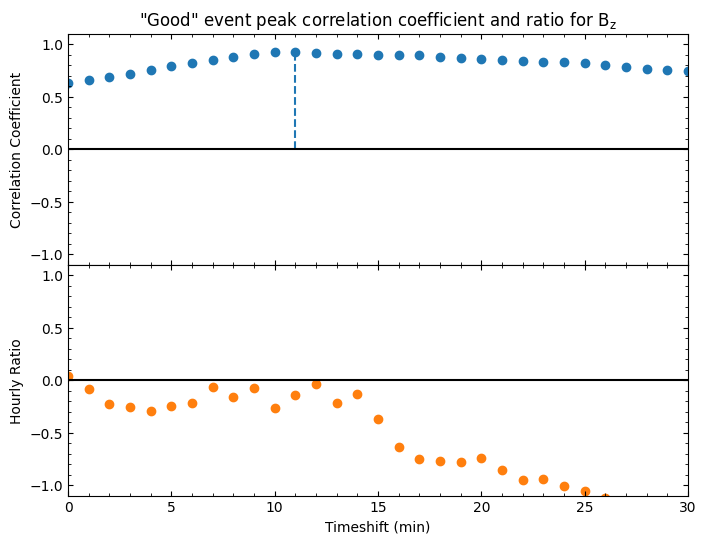

In [10]:
correlate(goodArtemis, goodOmni, pd.Timestamp('2019-11-27 17:00:00'), pd.Timestamp('2019-11-27 19:30:00'), '"Good" event peak correlation coefficient and ratio for $\mathrm{B_z}$', '20191127_CorrAndRatio.png')

0
110
30
140
110


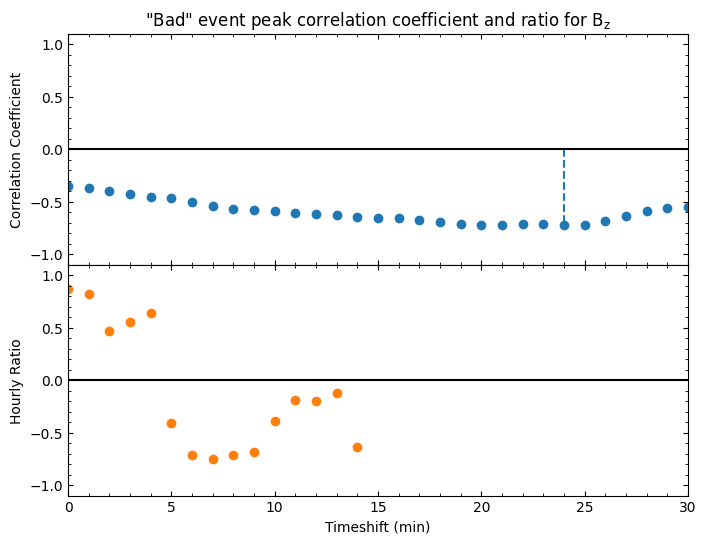

In [11]:
correlate(badArtemis, badOmni, pd.Timestamp('2015-03-16 04:20:00'), pd.Timestamp('2015-03-16 06:10:00'), '"Bad" event peak correlation coefficient and ratio for $\mathrm{B_z}$', '20150316_CorrAndRatio.png')

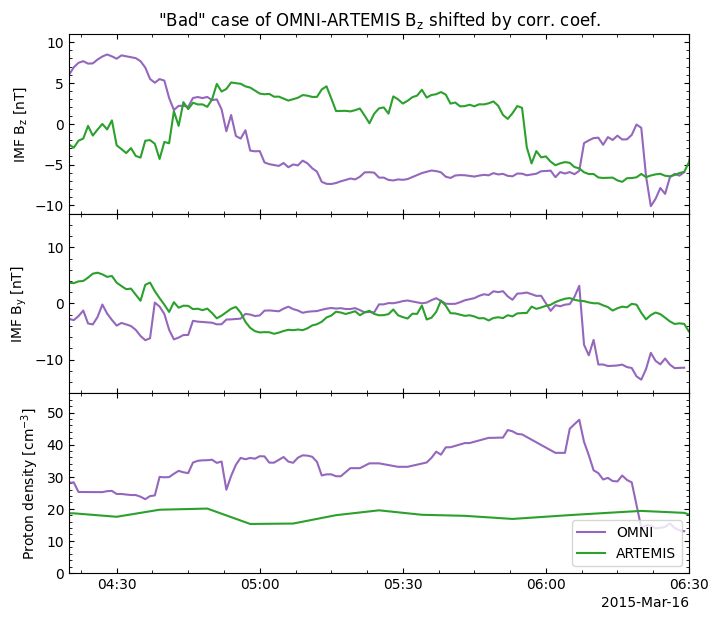

In [369]:
# Plot unshifted data

badArtemis['Timeshift'] = [timestamp+dt.timedelta(minutes=24) for timestamp in badArtemis['Time']]

fig, (ax1, ax2, ax3)  = plt.subplots(3, 1, figsize=(8,7), sharex=True)
plt.subplots_adjust(hspace=0.0)

ax1.plot(badOmni['Time'], badOmni['BZ_GSE'], color='C4', label='OMNI')
ax1.plot(badArtemis['Timeshift'], badArtemis['BZ_GSE'], color='C2', label='ARTEMIS')
ax1.set_xlim(pd.Timestamp('2015-03-16 04:20:00'), pd.Timestamp('2015-03-16 06:30:00'))
ax1.set_ylabel(r'IMF $\mathrm{B_z}$ [nT]')
ax1.set_ylim((-11, 11))

ax2.plot(badOmni['Time'], badOmni['BY_GSE'], color='C4')
ax2.plot(badArtemis['Timeshift'], badArtemis['BY_GSE'], color='C2')
ax2.set_ylabel(r'IMF $\mathrm{B_y}$ [nT]')
ax2.set_ylim((-16, 16))

ax3.plot(badOmni['Time'], badOmni['proton_density'], color='C4', label='OMNI')
ax3.plot(badArtemis['Timeshift'], badArtemis['proton_density'], color='C2', label='ARTEMIS')
ax3.set_ylabel(r'Proton density [cm$^{-3}$]')
ax3.set_ylim((0, 56))
ax3.legend(loc='lower right')

ax3.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=8))
ax3.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax3.xaxis.get_major_locator()))

for axes in [ax1, ax2, ax3]:
    axes.tick_params(which='both', axis='both', direction='in', top=True, right=True)
    axes.xaxis.set_minor_locator(AutoMinorLocator())
    axes.yaxis.set_minor_locator(AutoMinorLocator())

ax1.set_title(r'"Bad" case of OMNI-ARTEMIS $\mathrm{B_z}$ shifted by corr. coef.')
plt.savefig('badcase_shifted.png', dpi=300)

In [504]:
# Bin all the data by 0.1 correlation coefficient
distValues = pd.read_csv('../output-data/MergedEvents.csv', header=0, index_col=False, usecols=[1,2,4,5,12,13],names=['Start', 'Stop', 'P_By' ,'P_Bz', 'R_By', 'R_Bz'])

distValues['P_trunc'] = np.zeros(len(distValues['P_Bz']))
distValues['R_trunc'] = np.zeros(len(distValues['R_Bz']))

for i in range(len(distValues['P_Bz'])):
    if distValues['P_Bz'][i] < 0:
        distValues['P_trunc'][i] = -1
    else:
        distValues['P_trunc'][i] = int(str(distValues['P_Bz'][i])[2])

for j in range(len(distValues['R_Bz'])):
    if distValues['R_Bz'][j] < 0:
        distValues['R_trunc'][j] = -1
    else:
        distValues['R_trunc'][j] = int(str(distValues['R_Bz'][j])[2])

distValues['P_trunc'] = [int(i) for i in distValues['P_trunc']]
distValues['R_trunc'] = [int(i) for i in distValues['R_trunc']]

/var/folders/r8/nn5k90kx62v517flg32_mpw40000gn/T/ipykernel_9196/2244241690.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distValues['P_trunc'][i] = int(str(distValues['P_Bz'][i])[2])
/var/folders/r8/nn5k90kx62v517flg32_mpw40000gn/T/ipykernel_9196/2244241690.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distValues['P_trunc'][i] = -1
/var/folders/r8/nn5k90kx62v517flg32_mpw40000gn/T/ipykernel_9196/2244241690.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [505]:
binVals = pd.DataFrame({'corrs': np.zeros(12), 'ratios':np.zeros(12)})
binCutoffs = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1]

In [506]:
for i,b in enumerate(binCutoffs):
    binVals['corrs'][i] = binVals['corrs'][i] + len([j for j in distValues['P_trunc'] if j >= b])
    binVals['ratios'][i] = binVals['ratios'][i] + len([j for j in distValues['R_trunc'] if j >= b])

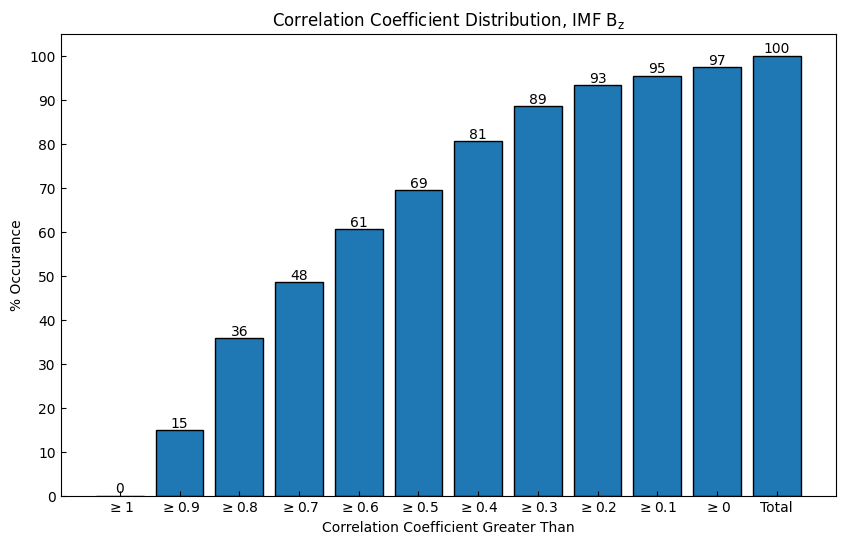

In [552]:
fig, ax = plt.subplots(figsize = (10,6))

bins = [r"$\geq$1", r"$\geq$0.9", r"$\geq$0.8", r"$\geq$0.7", r"$\geq$0.6", r"$\geq$0.5", r"$\geq$0.4", r"$\geq$0.3", r"$\geq$0.2", r"$\geq$0.1", r"$\geq$0", "Total"]
#bars1 = ax.bar(bins, [(val/max(binVals['corrs']))*100 for val in binVals['corrs']], color='C0', label="ARTEMIS and OMNI", width=0.8, edgecolor="black")
bars1 = ax.bar(bins, [(val/len(distValues['P_Bz']))*100 for val in binVals['corrs']], color='C0', label="ARTEMIS and OMNI", width=0.8, edgecolor="black")
#ax.legend(loc="lower right")

ax.bar_label(bars1, fmt='%.0f')

ax.set_ylabel("% Occurance")
ax.set_xlabel("Correlation Coefficient Greater Than")
ax.set_title("Correlation Coefficient Distribution, IMF $\mathrm{B_z}$")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='both', direction='in')

plt.savefig("allBzCorrs.png", dpi=300)

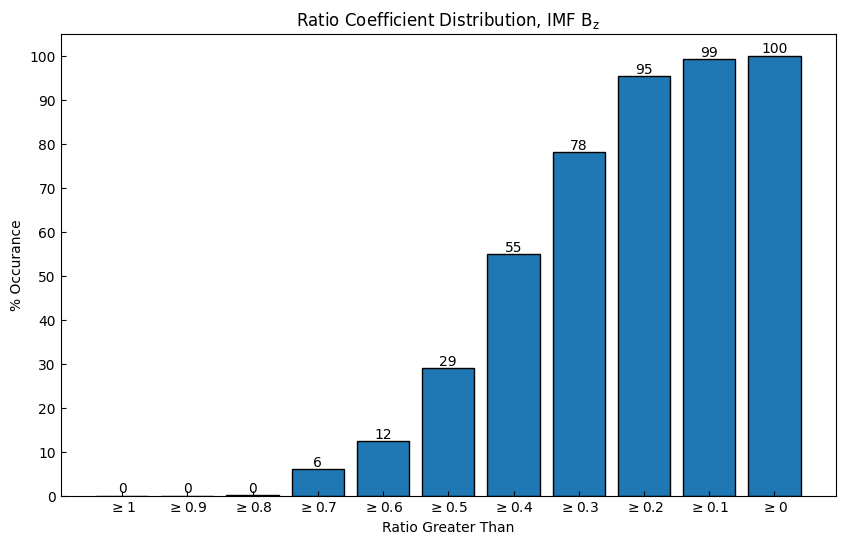

In [550]:
fig, ax = plt.subplots(figsize = (10,6))

bins = [r"$\geq$1", r"$\geq$0.9", r"$\geq$0.8", r"$\geq$0.7", r"$\geq$0.6", r"$\geq$0.5", r"$\geq$0.4", r"$\geq$0.3", r"$\geq$0.2", r"$\geq$0.1", r"$\geq$0"]
#bars1 = ax.bar(bins, [(val/max(binVals['ratios']))*100 for val in binVals['ratios'][0:11]], color='C0', label="ARTEMIS and OMNI", width=0.8, edgecolor="black")
bars1 = ax.bar(bins, [(val/len(distValues['R_Bz']))*100 for val in binVals['ratios'][0:11]], color='C0', label="ARTEMIS and OMNI", width=0.8, edgecolor="black")
#ax.legend(loc="lower right")

ax.bar_label(bars1, fmt='%.0f')

ax.set_ylabel("% Occurance")
ax.set_xlabel("Ratio Greater Than")
ax.set_title("Ratio Coefficient Distribution, IMF $\mathrm{B_z}$")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='both', direction='in')

plt.savefig("allBzRatios.png", dpi=300)

(0.0, 1.0)

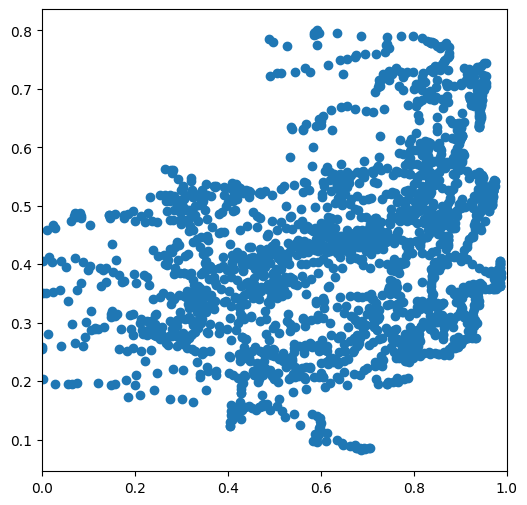

In [511]:
# Bin all the data by 0.1 correlation coefficient
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(distValues['P_Bz'], distValues['R_Bz'])
ax.set_xlim((0,1))

In [512]:
colorMapVals = np.zeros((12,12))

for i in range(len(distValues['P_trunc'])):
    colorMapVals[distValues['R_trunc'][i]+1, distValues['P_trunc'][i]+1] = colorMapVals[distValues['R_trunc'][i]+1, distValues['P_trunc'][i]+1] + 1

Text(0, 0.5, 'Ratio')

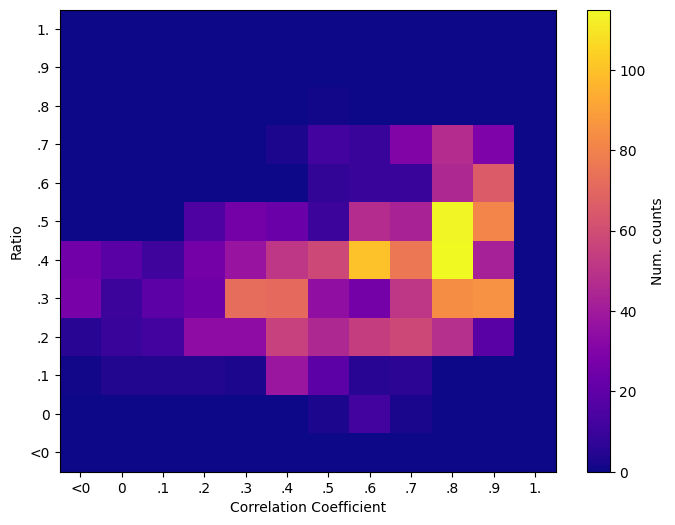

In [513]:
fig, ax = plt.subplots(figsize=(8,6))
bins = ["<0", '0', '.1', '.2', '.3', '.4', '.5', '.6', '.7', '.8', '.9', '1.']
P = plt.pcolormesh(bins, bins, colorMapVals, cmap='plasma')
fig.colorbar(P).set_label('Num. counts')

plt.xlabel('Correlation Coefficient')
plt.ylabel('Ratio')

In [554]:
colorMapSum = np.zeros((12,12))

for j in range(12):
    for i in range(12):
        colorMapSum[i,j] = np.sum(np.sum(array) for array in colorMapVals[i:,j:])/len(distValues['R_Bz'])*100


/var/folders/r8/nn5k90kx62v517flg32_mpw40000gn/T/ipykernel_9196/1150707202.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  colorMapSum[i,j] = np.sum(np.sum(array) for array in colorMapVals[i:,j:])/len(distValues['R_Bz'])*100


In [555]:
colorMapSum

array([[1.00000000e+02, 9.73185391e+01, 9.54230236e+01, 9.32963477e+01,
        8.85344429e+01, 8.05825243e+01, 6.94405918e+01, 6.06102635e+01,
        4.84974572e+01, 3.57836338e+01, 1.48404993e+01, 0.00000000e+00],
       [1.00000000e+02, 9.73185391e+01, 9.54230236e+01, 9.32963477e+01,
        8.85344429e+01, 8.05825243e+01, 6.94405918e+01, 6.06102635e+01,
        4.84974572e+01, 3.57836338e+01, 1.48404993e+01, 0.00000000e+00],
       [9.92140546e+01, 9.65325936e+01, 9.46370781e+01, 9.25104022e+01,
        8.77484975e+01, 7.97965788e+01, 6.86546463e+01, 5.99630143e+01,
        4.84049931e+01, 3.57836338e+01, 1.48404993e+01, 0.00000000e+00],
       [9.53305594e+01, 9.26953306e+01, 9.09847434e+01, 8.90429958e+01,
        8.44660194e+01, 7.66527970e+01, 6.72676838e+01, 5.94544614e+01,
        4.81276006e+01, 3.57836338e+01, 1.48404993e+01, 0.00000000e+00],
       [7.81322238e+01, 7.57281553e+01, 7.44336570e+01, 7.30466944e+01,
        7.00416089e+01, 6.38002774e+01, 5.69579288e+01, 5.12

Text(0, 0.5, 'Ratio')

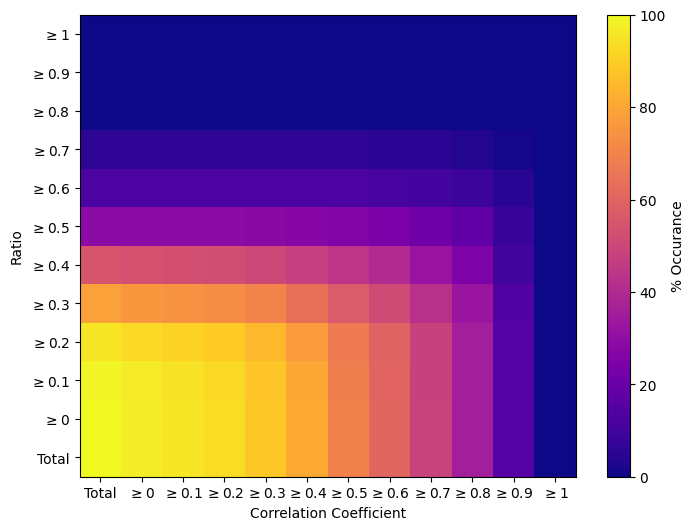

In [559]:
fig, ax = plt.subplots(figsize=(8,6))
bins = [r"Total", r"$\geq$0", r"$\geq$0.1", r"$\geq$0.2", r"$\geq$0.3", r"$\geq$0.4", r"$\geq$0.5", r"$\geq$0.6", r"$\geq$0.7",  r"$\geq$0.8", r"$\geq$0.9", r"$\geq$1"]
P = plt.pcolormesh(bins, bins, colorMapSum, cmap='plasma')
fig.colorbar(P).set_label('% Occurance')

plt.xlabel('Correlation Coefficient')
plt.ylabel('Ratio')

In [604]:
timestamps = ['20191127', '20150316']
models = ['swmf', 'lfm']
t = timestamps[0]
m = models[1]

/var/folders/r8/nn5k90kx62v517flg32_mpw40000gn/T/ipykernel_9196/1641750576.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  file1 = pd.read_csv('../CCMC/{}_{}_omni.txt'.format(t, m), delim_whitespace=True, comment='#', index_col=False, header=None, dtype={0:int, 1:int, 2:int, 3:int, 4:int, 5:int}, names=['Year', 'Month', 'Day', 'Hour', 'Min', 'Sec', 'JH_N', 'I_N', 'DP_N', 'JH_S', 'I_S', 'DP_S', 'W_N', 'W_S'])
/var/folders/r8/nn5k90kx62v517flg32_mpw40000gn/T/ipykernel_9196/1641750576.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  file2 = pd.read_csv('../CCMC/{}_{}_artemis.txt'.format(t, m), delim_whitespace=True, comment='#', index_col=False, header=None, dtype={0:int, 1:int, 2:int, 3:int, 4:int, 5:int}, names=['Year', 'Month', 'Day', 'Hour', 'Min', 'Sec', 'JH_N', 'I_N', 'DP_N', 'JH_S', 'I_S', 'DP_S', 'W_N', 'W_S'])


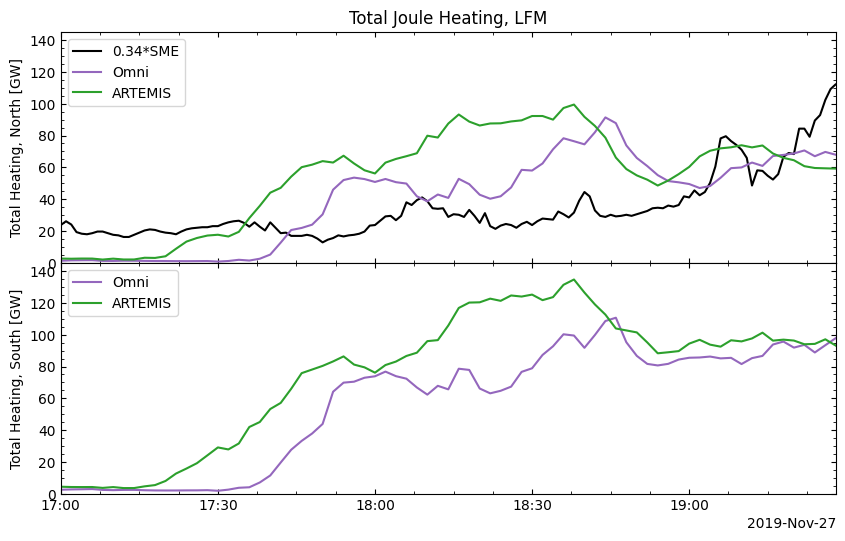

In [605]:
file1 = pd.read_csv('../CCMC/{}_{}_omni.txt'.format(t, m), delim_whitespace=True, comment='#', index_col=False, header=None, dtype={0:int, 1:int, 2:int, 3:int, 4:int, 5:int}, names=['Year', 'Month', 'Day', 'Hour', 'Min', 'Sec', 'JH_N', 'I_N', 'DP_N', 'JH_S', 'I_S', 'DP_S', 'W_N', 'W_S'])
file2 = pd.read_csv('../CCMC/{}_{}_artemis.txt'.format(t, m), delim_whitespace=True, comment='#', index_col=False, header=None, dtype={0:int, 1:int, 2:int, 3:int, 4:int, 5:int}, names=['Year', 'Month', 'Day', 'Hour', 'Min', 'Sec', 'JH_N', 'I_N', 'DP_N', 'JH_S', 'I_S', 'DP_S', 'W_N', 'W_S'])

SMEfile = pd.read_csv('{}-supermag.csv'.format(t), index_col=False, header=0)
SMEfile['JH'] = [0.34*sme for sme in SMEfile['SME']]

file1['Time'] = pd.to_datetime(file1['Year'].astype(str)+file1['Month'].astype(str)+file1['Day'].astype(str)+file1['Hour'].astype(str)+file1['Min'].astype(str)+file1['Sec'].astype(str), format='%Y%m%d%H%M%S')
file2['Time'] = pd.to_datetime(file2['Year'].astype(str)+file2['Month'].astype(str)+file2['Day'].astype(str)+file2['Hour'].astype(str)+file2['Min'].astype(str)+file2['Sec'].astype(str), format='%Y%m%d%H%M%S')
SMEfile['Date_UTC'] = pd.to_datetime(SMEfile['Date_UTC'], format='%Y-%m-%d %H:%M:%S')

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10,6), sharex=True)
plt.subplots_adjust(hspace=0)
ax0.plot(SMEfile['Date_UTC'], SMEfile['JH'], label='0.34*SME', color='k')
ax0.plot(file1['Time'], file1['JH_N'], label='Omni', color='C4')
ax0.plot(file2['Time'], file2['JH_N'], label='ARTEMIS', color='C2')
ax0.legend(loc='lower right')
ax0.set_ylabel('Total Heating, North [GW]')
ax0.set_xlim((file1['Time'][0], file1['Time'][len(file1['Time'])-1]))
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())
ax0.tick_params(which='both', axis='both', direction='in', top=True, right=True)
ax0.legend(loc='upper left')
ax0.set_ylim((0, 145))

ax1.plot(file1['Time'], file1['JH_S'], label='Omni', color='C4')
ax1.plot(file2['Time'], file2['JH_S'], label='ARTEMIS', color='C2')
ax1.legend(loc='upper left')
ax1.set_ylabel('Total Heating, South [GW]')
#ax1.set_xlabel()
ax1.set_xlim((file1['Time'][0], file1['Time'][len(file1['Time'])-1]))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', axis='both', direction='in', top=True, right=True)
ax1.set_ylim((0, 145))

ax1.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=8))
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax0.xaxis.get_major_locator()))
ax0.set_title('Total Joule Heating, LFM'.format(m))
plt.savefig('{}_{}_SME.png'.format(t,m), dpi=300)